In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/south-african-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 437 total reviews
Scraping page 6
   ---> 437 total reviews
Scraping page 7
   ---> 437 total reviews
Scraping page 8
   ---> 437 total reviews
Scraping page 9
   ---> 437 total reviews
Scraping page 10
   ---> 437 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I expected the Egyptian chec...
1,Not Verified | Following the demise of BA Com...
2,✅ Trip Verified | My husband and I bought tic...
3,✅ Trip Verified | South Africa Airlines cance...
4,✅ Trip Verified | I arrived to Johannesburg o...


# Data cleaning

In [4]:
df

,reviews
0,✅ Trip Verified | I expected the Egyptian chec...
1,Not Verified | Following the demise of BA Com...
2,✅ Trip Verified | My husband and I bought tic...
3,✅ Trip Verified | South Africa Airlines cance...
4,✅ Trip Verified | I arrived to Johannesburg o...
...,...
432,The aircraft was clearly very old cramped seat...
433,Had a wonderful experience on JFK-JNB in busin...
434,JNB-LLW and NBO-JNB economy. First leg okay th...
435,My thanks to airline retrieving wrapping and d...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,I expected the Egyptian check in people to be...
1,Following the demise of BA Comair we were bo...
2,My husband and I bought tickets in March 202...
3,South Africa Airlines canceled my flight New...
4,I arrived to Johannesburg on an internationa...
...,...
432,None
433,None
434,None
435,None


# cleaning the text

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I expected the Egyptian check in people to be...,I expected the Egyptian check in people to be...
1,Following the demise of BA Comair we were bo...,Following the demise of BA Comair we were boo...
2,My husband and I bought tickets in March 202...,My husband and I bought tickets in March to t...
3,South Africa Airlines canceled my flight New...,South Africa Airlines canceled my flight New ...
4,I arrived to Johannesburg on an internationa...,I arrived to Johannesburg on an international...


# tokenization and lematization

In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jedaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jedaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jedaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jedaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jedaiah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I expected the Egyptian check in people to be...,I expected the Egyptian check in people to be...,"[(expected, v), (Egyptian, a), (check, n), (pe..."
1,Following the demise of BA Comair we were bo...,Following the demise of BA Comair we were boo...,"[(Following, v), (demise, n), (BA, n), (Comair..."
2,My husband and I bought tickets in March 202...,My husband and I bought tickets in March to t...,"[(husband, n), (bought, v), (tickets, n), (Mar..."
3,South Africa Airlines canceled my flight New...,South Africa Airlines canceled my flight New ...,"[(South, n), (Africa, n), (Airlines, n), (canc..."
4,I arrived to Johannesburg on an internationa...,I arrived to Johannesburg on an international...,"[(arrived, v), (Johannesburg, n), (internation..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I expected the Egyptian check in people to be...,I expected the Egyptian check in people to be...,"[(expected, v), (Egyptian, a), (check, n), (pe...",expect Egyptian check people difficult boy w...
1,Following the demise of BA Comair we were bo...,Following the demise of BA Comair we were boo...,"[(Following, v), (demise, n), (BA, n), (Comair...",Following demise BA Comair book onto SAA fin...
2,My husband and I bought tickets in March 202...,My husband and I bought tickets in March to t...,"[(husband, n), (bought, v), (tickets, n), (Mar...",husband buy ticket March travel Columbus OH ...
3,South Africa Airlines canceled my flight New...,South Africa Airlines canceled my flight New ...,"[(South, n), (Africa, n), (Airlines, n), (canc...",South Africa Airlines cancel flight New York...
4,I arrived to Johannesburg on an internationa...,I arrived to Johannesburg on an international...,"[(arrived, v), (Johannesburg, n), (internation...",arrive Johannesburg international flight Mar...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I expected the Egyptian check in people to be...,expect Egyptian check people difficult boy w...
1,Following the demise of BA Comair we were bo...,Following demise BA Comair book onto SAA fin...
2,My husband and I bought tickets in March 202...,husband buy ticket March travel Columbus OH ...
3,South Africa Airlines canceled my flight New...,South Africa Airlines cancel flight New York...
4,I arrived to Johannesburg on an internationa...,arrive Johannesburg international flight Mar...
...,...,...
432,None,None
433,None,None
434,None,None
435,None,None


# Sentiment Analysis using VADER

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I expected the Egyptian check in people to be...,I expected the Egyptian check in people to be...,"[(expected, v), (Egyptian, a), (check, n), (pe...",expect Egyptian check people difficult boy w...,0.8984,Positive
1,Following the demise of BA Comair we were bo...,Following the demise of BA Comair we were boo...,"[(Following, v), (demise, n), (BA, n), (Comair...",Following demise BA Comair book onto SAA fin...,0.9738,Positive
2,My husband and I bought tickets in March 202...,My husband and I bought tickets in March to t...,"[(husband, n), (bought, v), (tickets, n), (Mar...",husband buy ticket March travel Columbus OH ...,-0.2111,Negative
3,South Africa Airlines canceled my flight New...,South Africa Airlines canceled my flight New ...,"[(South, n), (Africa, n), (Airlines, n), (canc...",South Africa Airlines cancel flight New York...,-0.6808,Negative
4,I arrived to Johannesburg on an internationa...,I arrived to Johannesburg on an international...,"[(arrived, v), (Johannesburg, n), (internation...",arrive Johannesburg international flight Mar...,0.6369,Positive


In [13]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral     337
Positive     56
Negative     44
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x17d24d1ae50>,
 [Text(-0.8277836958202156, 0.7244129712630945, 'Neutral'),
  Text(0.5613742736363599, -0.9459698329752643, 'Positive'),
  Text(1.28302357640193, -0.419941070147707, 'Negative')],
 [Text(-0.4515183795382994, 0.39513434796168784, '77.1%'),
  Text(0.30620414925619627, -0.5159835452592351, '12.8%'),
  Text(0.8078296592160298, -0.2644073404633711, '10.1%')])

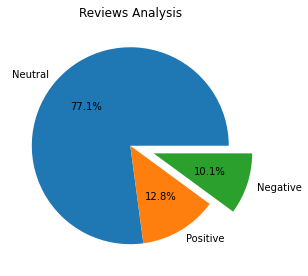

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# word cloud

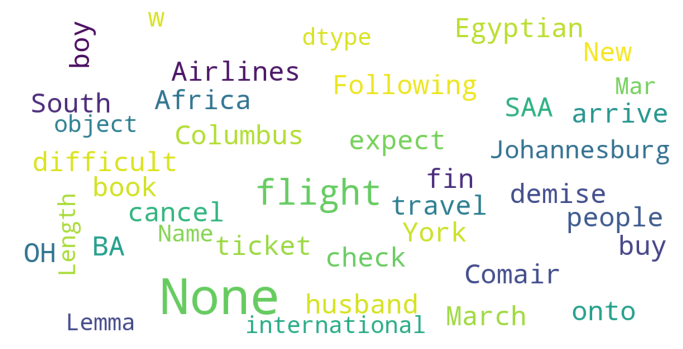

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)